# PSO algorithm interia factor analysis

In [4]:
#подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import math

## Функции для анализа

### Функция Растригина

In [5]:
def rastr(varAm, partAm, partPos):
    partVal0 = np.empty(0)
    
    for i in range(partAm):
        vector0 = np.empty(0) 
        
        for j in range(varAm):
            vector0 = np.append(vector0, pow(partPos[i,j],2) - 10 * math.cos(2 * math.pi * partPos[i,j]))  
            
        vector0 = sum(vector0) + 10 * varAm
        partVal0 = np.append(partVal0, vector0)  
        
    partVal = partVal0   
    
    return partVal

In [6]:
rastr(2, 2, np.array(((0,0),(1,3))))

array([ 0., 10.])

### Функция Экли

In [7]:
def ekl(partAm, partPos):
    partVal = np.empty(0)
    
    for i in range(partAm):
        
        partVal = np.append(partVal, (-math.exp(0.5 * (math.cos(2 * math.pi * partPos[i,0])+
                    math.cos(2 * math.pi * partPos[i,1])))) - (20 * math.exp(-0.2 * math.sqrt(0.5 * 
                    (pow(partPos[i,0],2) + pow(partPos[i,1],2))))) + math.exp(1) + 20) 
    
    return partVal

In [8]:
ekl(2, np.array(((0,0),(1,3))))

array([0.        , 7.21185362])

### Функция сферы

In [9]:
def sphere(varAm, partAm, partPos):
    partVal0 = np.empty(0)
    
    for i in range(partAm):
        vector0 = np.empty(0) 
        
        for j in range(varAm):
            vector0 = np.append(vector0, pow(partPos[i,j],2))  
            
        vector0 = sum(vector0)
        partVal0 = np.append(partVal0, vector0)  
        
    partVal = partVal0   
    
    return partVal

In [10]:
sphere(2, 2, np.array(((0,0),(1,3))))

array([ 0., 10.])

### Функция Бута

In [11]:
def but(partAm, partPos):
    partVal = np.empty(0)
    
    for i in range(partAm):
        
        partVal = np.append(partVal, pow(partPos[i,0] + 2 * partPos[i,1] - 7,2) + 
                            pow (2 * partPos[i,0] + partPos[i,1] - 5, 2)
                           ) 
    
    return partVal

In [12]:
but(2, np.array(((0,0),(1,3))))

array([74.,  0.])

### Функция Била

In [13]:
def but(partAm, partPos):
    partVal = np.empty(0)
    
    for i in range(partAm):
        
        partVal = np.append(partVal, pow(1.5 - partPos[i,0] + partPos[i,0] * partPos[i,1], 2) +
                            pow(2.25 - partPos[i,0] + partPos[i,0] * pow(partPos[i,1], 2), 2) +
                            pow(2.625 - partPos[i,0] + partPos[i,0] * pow(partPos[i,1], 3), 2)
                           ) 
    
    return partVal

## Алгоритм роя частиц с меняющимся коэффициентом инерции

### Линейные коэффициенты инерции

Первый линейный коэффициент (предложен Юхи Ши и Расселом Эберхартом)

In [15]:
def wLin1(tmax, t, wmin, wmax):
    w = (tmax - t)/tmax * (wmax - wmin) + wmin
    return w

Второй линейный коэффициент (предложен Харрисоном К.)

In [16]:
def wLin2(t, tmax):
    w = 0.5 * t/tmax + 0.4
    return w

Третий линеный коэффициент (сначала увеличивается, затем уменьшается)

In [17]:
def wLin3(t, tmax):
    if t/tmax <= 0.5:
        w = 1 * t/tmax + 0.4
    else: 
        w = -1 * t/tmax + 1.4  
    return w

 Четвертый линейный коэффициент (учитывает среднее расстояние между частицами)

In [18]:
def wLin4(dmin, dmax, d, wmin, wmax):
    w = (wmax - wmin)/(dmax - dmin) * d + (dmax * wmin - dmin * wmax)/(dmax - dmin)
    return w

### Нелинейные коэффциенты инерции

Первый нелинейный коэффициент (предложен Д. Тианом и Дж. Ши)

In [19]:
def wNotLin1(wmin, wmax, t, tmax):
    w = wmin + (wmax - wmin) * pow(math.exp(1), -t/(tmax/10))
    return w

Второй нелинейный коэффициент (предложен Б. Джиао и З. Лиань)

In [20]:
def wNotLin2(wstart, u, t):
    w = wstart * pow(u, t)
    return w

### Случайные коэффциенты инерции

Первый случайный коэффициент

In [21]:
def wRand1():
    w = 0.5 + random.random()/2
    return w

In [22]:
random.random()

0.8750996863423752

Второй случайный коэффициент

In [23]:
def wRand2(alf1, afl2, bestValueHistory, t):
    k = (bestValueHistory[t] - bestValueHistory[t - 10])/ bestValueHistory[t - 10]
    
    if k >= 0.05:
        w = alf1 + random.random()/2
    else:
        w = alf2 + random.random()/2
    return w

### PSO - algorithm

Исходные данные

In [82]:
iterAmount = 500
varAmount = 2
particlesAmount = 100
pMin = -50
pMax = 50
w = 0.2
c1 = 0.2
c2 = 0.3

particlesPosition = np.random.uniform(pMin, pMax, size=(particlesAmount,varAmount))
particlesVelocity = np.zeros((particlesAmount,varAmount))
particlesValue = rastr(varAmount,particlesAmount,particlesPosition)
bestValue = min(particlesValue)
bestPosition = particlesPosition[np.where(particlesValue == bestValue)[0]][0]
bestParticlesValue = particlesValue 
bestParticlesPosition = particlesPosition

bestValueVector = np.empty(0)
bestPositionVector = np.empty(0)
bestParticlesPositionVector = np.empty(0)
bestParticlesValueVector = np.empty(0)

In [83]:
for k in range(iterAmount):
    
    #пересчет скорости и позиции частиц
    for i in range(particlesAmount):
        for j in range(varAmount):
            particlesVelocity[i,j] = (wLin1(iterAmount,k, 0.2, 1) * particlesVelocity[i,j] + 
                                      c1 * random.random() * (bestParticlesPosition[i,j] - particlesPosition[i,j]) + 
                                      c2 * random.random() * (bestPosition[j] - particlesPosition[i,j]))

        
            dist = particlesPosition[i,j] + particlesVelocity[i,j]
            
            if dist < pMin:
                particlesPosition[i,j] = pMin
            elif dist > pMax:
                particlesPosition[i,j] = pMax
            else:
                particlesPosition[i,j] = dist
            
    
    #пересчет значений функции
    particlesValue = rastr(varAmount, particlesAmount, particlesPosition)
    
    #обновление значений
    for i in range(particlesAmount):
        t = particlesValue[i]
    
        if bestParticlesValue[i] > t:
            bestParticlesValue[i] = t
            bestParticlesPosition[i] = particlesPosition[i]
        
        if bestValue > t:
            bestValue = t
            bestPosition = particlesPosition[i]
            
    bestValueVector = np.append(bestValueVector, bestValue)
    bestPositionVector = np.append(bestPositionVector, bestPosition)
    bestParticlesValueVector = np.append(bestParticlesValueVector, bestParticlesValue)
    bestParticlesPositionVector = np.append(bestParticlesPositionVector, bestParticlesPosition)

([<matplotlib.axis.XTick at 0x7f9b26e06370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

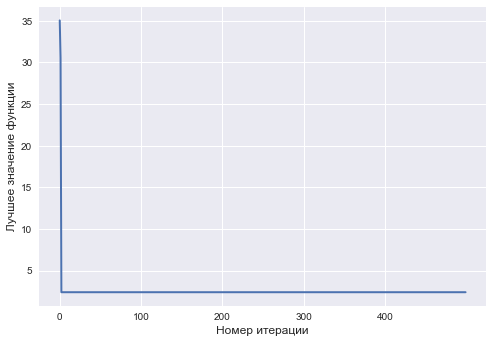

In [84]:
plt.style.use("seaborn")
plt.xlabel('Номер итерации', fontsize = 12)
plt.ylabel('Лучшее значение функции', fontsize = 12)
plt.plot(bestValueVector, linewidth=2)
plt.xticks(np.arange(0, 500, step=100))

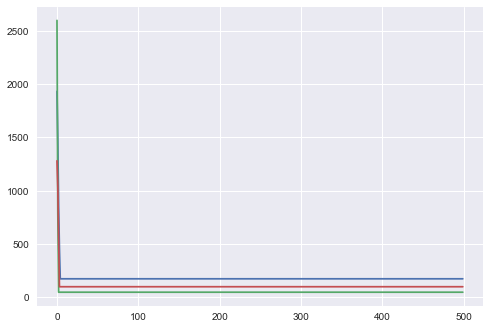

In [85]:
plt.plot(bestParticlesValueVector.reshape(500, particlesAmount).transpose()[1])
plt.plot(bestParticlesValueVector.reshape(500, particlesAmount).transpose()[2])
plt.plot(bestParticlesValueVector.reshape(500, particlesAmount).transpose()[3])